In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv("/Users/soumobratamanna/Documents/AI_ML PROJECTS/car data.csv")

In [3]:
data.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [4]:
data.tail(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
291,brio,2015,5.40,6.10,31427,Petrol,Dealer,Manual,0
292,jazz,2016,6.40,8.40,12000,Petrol,Dealer,Manual,0
293,city,2010,3.25,9.90,38000,Petrol,Dealer,Manual,0
294,amaze,2014,3.75,6.80,33019,Petrol,Dealer,Manual,0
295,city,2015,8.55,13.09,60076,Diesel,Dealer,Manual,0
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.90,5464,Petrol,Dealer,Manual,0


In [5]:
data.shape

(301, 9)

In [37]:
data.info

<bound method DataFrame.info of     Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014              3           5.59       27000    Petrol   
1        sx4  2013              4           9.54       43000    Diesel   
2       ciaz  2017              7           9.85        6900    Petrol   
3    wagon r  2011              2           4.15        5200    Petrol   
4      swift  2014              4           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016              9          11.60       33988    Diesel   
297     brio  2015              4           5.90       60000    Petrol   
298     city  2009              3          11.00       87934    Petrol   
299     city  2017             11          12.50        9000    Diesel   
300     brio  2016              5           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1  

In [38]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [55]:
#Encoding the fuel type
data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

#Encoding the Seller  type
data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

#Encoding the Transmission type
data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [56]:
X = data.drop(['Car_Name','Selling_Price'],axis=1) #Removing the 2 cols , name and the selling price from the dataset
Y = data['Selling_Price'] #Target varibale 

In [57]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [59]:
Y

0       3
1       4
2       7
3       2
4       4
       ..
296     9
297     4
298     3
299    11
300     5
Name: Selling_Price, Length: 301, dtype: int64

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=4)


In [62]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)


In [64]:
rf.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [65]:
y_predictions = rf.predict(X_test)

In [66]:
y_predictions

array([ 3.968,  5.873,  3.07 ,  5.078,  3.499,  0.   ,  0.   ,  0.   ,
        5.059,  2.681,  0.998,  2.481,  5.24 ,  5.881,  4.569,  0.   ,
       10.549,  2.303,  3.97 ,  6.294, 20.911,  0.996,  0.   ,  0.859,
        8.106,  5.706,  1.821,  0.   ,  7.57 ,  4.077,  0.   ,  4.886,
        0.   ,  0.   ,  6.745,  4.175,  0.   ,  3.002,  7.363,  8.363,
        2.558,  9.349,  3.358,  0.   ,  0.   ,  0.   ,  0.   ,  4.846,
        3.495,  5.656, 11.156,  2.815,  6.627,  5.075,  0.929,  2.389,
        3.008,  0.   ,  6.891, 21.412,  1.68 ])

In [78]:
from sklearn.metrics import mean_squared_error ,r2_score

In [79]:
mse = mean_squared_error(Y_test,y_predictions)

In [80]:
mse

2.8532218524590167

In [81]:
score = r2_score(Y_test,y_predictions)

In [82]:
score

0.9061519825949367

In [84]:
rmse = np.sqrt(mean_squared_error(Y_test,y_predictions))

In [85]:
rmse

1.6891482624266636

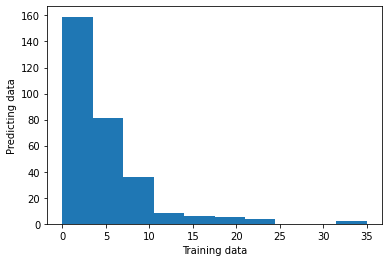

In [95]:
#Graph Plotting 

plt.hist(data["Selling_Price"])
plt.xlabel("Training data")
plt.ylabel("Predicting data")
plt.show()